In [198]:
#imported pacages
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import json_normalize
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import json

In [199]:
#Call for Characteristics of Businesses API
api_key='e802eba4ea002a5b16fec9195067d88607bc18b9'
HOST = "https://api.census.gov/data"
year = "2018"
dataset = "abscb"
base_url = "/".join([HOST, year, dataset])
predicates = {}
predicates["get"] = "GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,EMPSZFI,RCPSZFI,YIBSZFI"
predicates["for"] = 'us:*'
predicates["NAICS2017"]="54"#54 is code for firms in Professional, Scientific, and Technical Services
predicates["key"]=api_key
r = requests.get(f"{base_url}?get={predicates['get']}&for={predicates['for']}&NAICS2017={predicates['NAICS2017']}&key={predicates['key']}")
response=r.json()
business_df=pd.DataFrame(response[1:],columns=response[0])

In [200]:
#Development of Sex Breakdown of Owners Pie Chart
sex=business_df[(business_df.SEX!='096')&(business_df.SEX!='098')] #filter out Classifiable and Unclassifiable instances
fig_sex=px.pie(sex,values=list(sex['SEX']),names='SEX_LABEL',title='Breakdown of Business Owners By Sex')
fig_sex.show()

In [201]:
#Call to Company Summary API (for Tech Companies)
api_key1='e802eba4ea002a5b16fec9195067d88607bc18b9'
HOST1 = "https://api.census.gov/data"
year1 = "2018"
dataset1 = "abscs"
base_url1 = "/".join([HOST1, year1, dataset1])
predicates1 = {}
predicates1["get"] = "NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP,EMPSZFI,RCPSZFI,YIBSZFI"
predicates1["for"] = 'state:*'
predicates1["NAICS2017"]="54"#54 is code for firms in Professional, Scientific, and Technical Services
predicates1["key"]=api_key
r1= requests.get(f"{base_url1}?get={predicates1['get']}&for={predicates1['for']}&NAICS2017={predicates1['NAICS2017']}&key={predicates1['key']}")
response1=r1.json()
company_df=pd.DataFrame(response1[1:],columns=response1[0])


In [202]:
# dictionary for mapping state abbreviations to state name
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [203]:
#creating new data frame for number of businesses in each state with Abbreviations
state_df=pd.DataFrame()
state_df=state_df.assign(Number=company_df['NAME'].value_counts())
state_df['Code']=state_df.index.map(code)
print(state_df)


                      Number Code
California               682   CA
Florida                  647   FL
Texas                    639   TX
Colorado                 625   CO
Georgia                  624   GA
New York                 618   NY
Virginia                 612   VA
New Jersey               609   NJ
Arizona                  609   AZ
Washington               604   WA
Minnesota                602   MN
Massachusetts            602   MA
North Carolina           601   NC
Maryland                 600   MD
Oregon                   600   OR
Missouri                 597   MO
Nevada                   592   NV
Pennsylvania             592   PA
Illinois                 588   IL
Ohio                     586   OH
Oklahoma                 583   OK
Michigan                 581   MI
Wisconsin                573   WI
New Mexico               572   NM
Indiana                  569   IN
Hawaii                   569   HI
Alabama                  569   AL
Louisiana                567   LA
Tennessee     

In [204]:
#choropleth graph of number of businesses in each state
state_pic=px.choropleth(state_df,locations='Code',color='Number',color_continuous_scale='spectral_r',hover_name=state_df.index,locationmode='USA-states',scope='usa',labels={'Number':'Number of Companies'},title='Number of Business Firms in Each State')
state_pic.show()

In [205]:
#editing revenue column to have the numeric value (average of the range)
company_df=company_df.rename(columns={'EMPSZFI':'Employment_Size','RCPSZFI':'Revenue','YIBSZFI':'Years_in_Business'})
company_df['Revenue']=company_df['Revenue'].astype(float)
company_df['Revenue']=company_df['Revenue'].replace({511:2500,518:7500,519:17500,521:37500,522:75000,523:175000,525:375000,531:750000,532:1000000,1.0:500000})


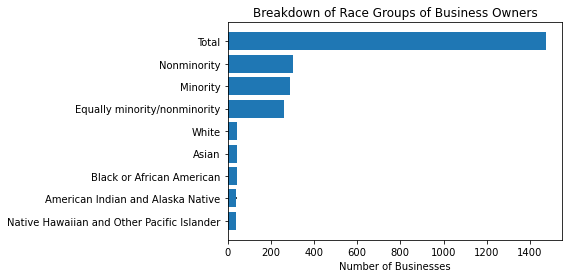

In [206]:
#Development of Race  Breakdown of Owners Horizontal Bar Graph
racer=business_df[(business_df.RACE_GROUP_LABEL!='Classifiable')&(business_df.RACE_GROUP_LABEL!='Unclassifiable')]#filtering out instances that have Classifiable/Unclassifiable Labels
race_df=pd.DataFrame()
race_df=race_df.assign(Number=racer['RACE_GROUP_LABEL'].value_counts())

fig,ax=plt.subplots()
ypos=np.arange(len(race_df))
error=np.random.rand(len(race_df))
ax.barh(ypos,race_df['Number'],xerr=error,align='center')
ax.set_yticks(ypos)
ax.set_yticklabels(race_df.index)
ax.invert_yaxis()
ax.set_xlabel('Number of Businesses')
ax.set_title('Breakdown of Race Groups of Business Owners')
plt.show()

In [207]:
#Call to Company Summary API (for All Companies)
api_key2='e802eba4ea002a5b16fec9195067d88607bc18b9'
HOST2 = "https://api.census.gov/data"
year2 = "2018"
dataset2 = "abscs"
base_url2 = "/".join([HOST2, year2, dataset2])
predicates2 = {}
predicates2["get"] = "NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP,EMPSZFI,RCPSZFI,YIBSZFI"
predicates2["for"] = 'us:*'
predicates2["NAICS2017"]="00"#54 is code for all firms
predicates2["key"]=api_key2
r2= requests.get(f"{base_url2}?get={predicates2['get']}&for={predicates2['for']}&NAICS2017={predicates2['NAICS2017']}&key={predicates2['key']}")
response2=r2.json()
acompany_df=pd.DataFrame(response2[1:],columns=response2[0])

In [208]:
#editing revenue column to have the numeric value (average of the range)
acompany_df=acompany_df.rename(columns={'EMPSZFI':'Employment_Size','RCPSZFI':'Revenue','YIBSZFI':'Years_in_Business'})
acompany_df['Revenue']=acompany_df['Revenue'].astype(float)
acompany_df['Revenue']=acompany_df['Revenue'].replace({511:2500,518:7500,519:17500,521:37500,522:75000,523:175000,525:375000,531:750000,532:1000000,1.0:500000})


In [209]:
#developing Violin Diagrams to show distribution of values of Revenue of just Tech Companies vs. All Companies
fig=go.Figure()
fig.add_trace(go.Violin(y=company_df['Revenue'], name='Revenue of Tech Companies',meanline_visible=True))
fig.add_trace(go.Violin(y=acompany_df['Revenue'],name='Revenue of All Companies',meanline_visible=True))
fig.show()